In [28]:
# Weekly Sales Forecasting - Exploratory Data Analysis (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [29]:
# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [30]:
df = pd.read_csv('/content/Assessment-2-Associate-DS(in).csv')

In [31]:
df.shape

(600, 7)

In [32]:
# Display first few rows
print(f"\nFirst 5 rows:")
print(df.head())

# Data types
print(f"\nData types:")
print(df.dtypes)


First 5 rows:
  weekend_date   channel brand category sub_category  SerailNum  quantity
0     4/6/2022  Channel1    B1     Cat2     Sub-Cat2          1        56
1    11/6/2022  Channel1    B1     Cat2     Sub-Cat2          1       122
2   18/06/2022  Channel1    B1     Cat2     Sub-Cat2          1       102
3   25/06/2022  Channel1    B1     Cat2     Sub-Cat2          1       128
4     2/7/2022  Channel1    B1     Cat2     Sub-Cat2          1        97

Data types:
weekend_date    object
channel         object
brand           object
category        object
sub_category    object
SerailNum        int64
quantity         int64
dtype: object


In [33]:
# Convert weekend_date to datetime if it's not already
df['weekend_date'] = pd.to_datetime(df['weekend_date'], format='mixed', dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   weekend_date  600 non-null    datetime64[ns]
 1   channel       600 non-null    object        
 2   brand         600 non-null    object        
 3   category      600 non-null    object        
 4   sub_category  600 non-null    object        
 5   SerailNum     600 non-null    int64         
 6   quantity      600 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 32.9+ KB


In [34]:
df.describe()

,weekend_date,SerailNum,quantity
count,600,600.000000,600.000000
mean,2023-08-26 23:14:24,3.048333,547.330000
min,2022-05-28 00:00:00,1.000000,1.000000
25%,2023-03-09 06:00:00,2.000000,121.000000
50%,2023-09-05 12:00:00,3.000000,244.500000
75%,2024-03-02 00:00:00,4.000000,624.500000
max,2024-08-31 00:00:00,5.000000,8051.000000
std,NaN,1.399737,925.749108


In [35]:
# Check for missing values
print(f"\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values:
weekend_date    0
channel         0
brand           0
category        0
sub_category    0
SerailNum       0
quantity        0
dtype: int64


In [36]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Duplicate rows: 0


In [39]:
df = df.rename(columns={'SerailNum': 'SerialNum'})

In [40]:
# Unique values in categorical columns
print(f"\nUnique values in categorical columns:")
categorical_cols = ['channel', 'brand', 'category', 'sub_category', 'SerialNum']
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")


Unique values in categorical columns:
channel: 3 unique values
brand: 2 unique values
category: 3 unique values
sub_category: 4 unique values
SerialNum: 5 unique values


In [41]:
# Date range analysis
print(f"\nDate Range Analysis:")
print(f"Start date: {df['weekend_date'].min()}")
print(f"End date: {df['weekend_date'].max()}")
print(f"Total weeks: {df['weekend_date'].nunique()}")
print(f"Date range: {(df['weekend_date'].max() - df['weekend_date'].min()).days} days")



Date Range Analysis:
Start date: 2022-05-28 00:00:00
End date: 2024-08-31 00:00:00
Total weeks: 119
Date range: 826 days


In [42]:
# Check for date gaps
date_range = pd.date_range(start=df['weekend_date'].min(),
                          end=df['weekend_date'].max(),
                          freq='W-SUN')
missing_dates = set(date_range) - set(df['weekend_date'].unique())
if missing_dates:
    print(f"⚠️  Missing dates detected: {len(missing_dates)} weeks")
    print(f"Missing dates: {sorted(list(missing_dates))[:10]}...")  # Show first 10
else:
    print("✓ No missing weeks detected")

⚠️  Missing dates detected: 118 weeks
Missing dates: [Timestamp('2022-05-29 00:00:00'), Timestamp('2022-06-05 00:00:00'), Timestamp('2022-06-12 00:00:00'), Timestamp('2022-06-19 00:00:00'), Timestamp('2022-06-26 00:00:00'), Timestamp('2022-07-03 00:00:00'), Timestamp('2022-07-10 00:00:00'), Timestamp('2022-07-17 00:00:00'), Timestamp('2022-07-24 00:00:00'), Timestamp('2022-07-31 00:00:00')]...


In [45]:
df['quantity'].mean()

np.float64(547.33)

In [47]:
print(f"Mean: {df['quantity'].mean():.2f}")
print(f"Median: {df['quantity'].median():.2f}")
print(f"Standard deviation: {df['quantity'].std():.2f}")
print(f"Min: {df['quantity'].min()}")
print(f"Max: {df['quantity'].max()}")

Mean: 547.33
Median: 244.50
Standard deviation: 925.75
Min: 1
Max: 8051


In [48]:
# Check for outliers using IQR method
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['quantity'] < lower_bound) | (df['quantity'] > upper_bound)]
print(f"\nOutliers (IQR method):")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")


Outliers (IQR method):
Lower bound: -634.25
Upper bound: 1379.75
Number of outliers: 43 (7.2%)


In [49]:
# Zero sales analysis
zero_sales = df[df['quantity'] == 0]
print(f"\nZero sales:")
print(f"Number of zero sales weeks: {len(zero_sales)} ({len(zero_sales)/len(df)*100:.1f}%)")


Zero sales:
Number of zero sales weeks: 0 (0.0%)


VISUALIZATIONS

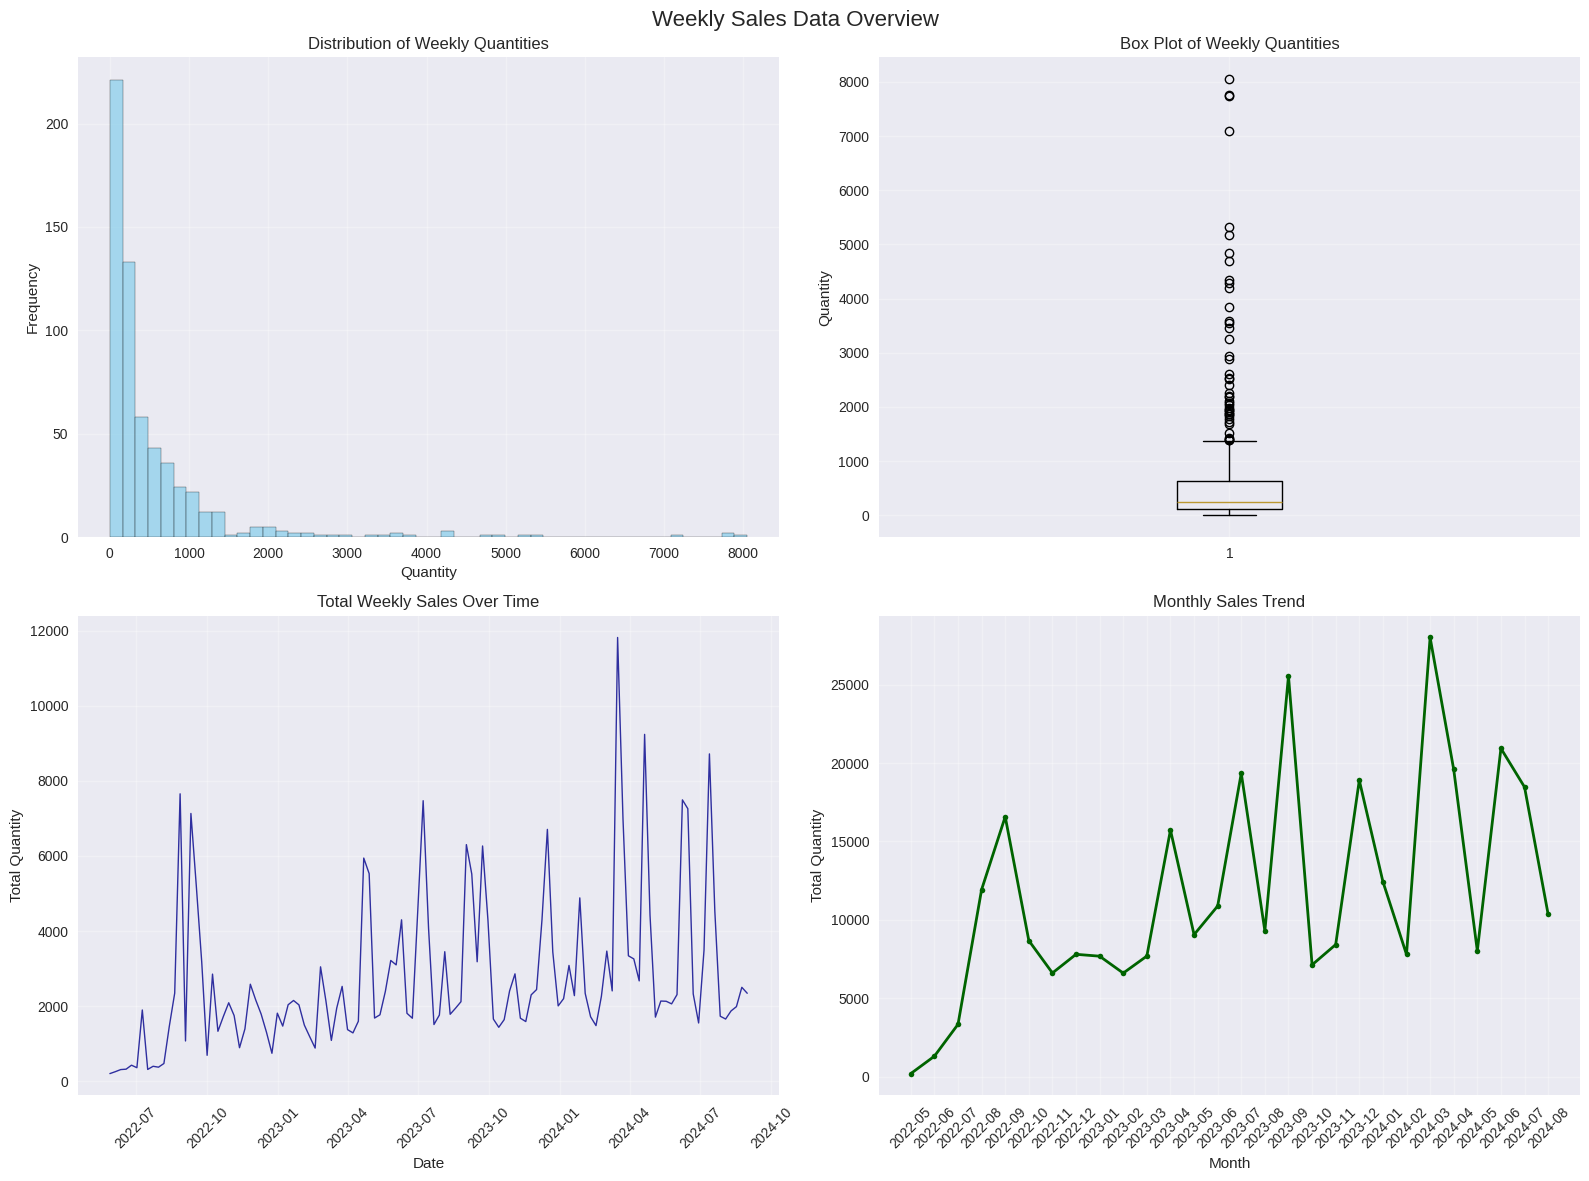

In [62]:

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Weekly Sales Data Overview', fontsize=16)

# 3.1 Distribution of quantities
axes[0,0].hist(df['quantity'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Weekly Quantities')
axes[0,0].set_xlabel('Quantity')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# 3.2 Box plot for outlier detection
axes[0,1].boxplot(df['quantity'])
axes[0,1].set_title('Box Plot of Weekly Quantities')
axes[0,1].set_ylabel('Quantity')
axes[0,1].grid(True, alpha=0.3)

# 3.3 Time series plot (aggregated)
weekly_total = df.groupby('weekend_date')['quantity'].sum().reset_index()
axes[1,0].plot(weekly_total['weekend_date'], weekly_total['quantity'],
               linewidth=1, alpha=0.8, color='darkblue')
axes[1,0].set_title('Total Weekly Sales Over Time')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Total Quantity')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# 3.4 Monthly aggregation
df['year_month'] = df['weekend_date'].dt.to_period('M')
monthly_sales = df.groupby('year_month')['quantity'].sum()
axes[1,1].plot(monthly_sales.index.astype(str), monthly_sales.values,
               marker='o', linewidth=2, markersize=4, color='darkgreen')
axes[1,1].set_title('Monthly Sales Trend')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Total Quantity')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

CATEGORICAL ANALYSIS

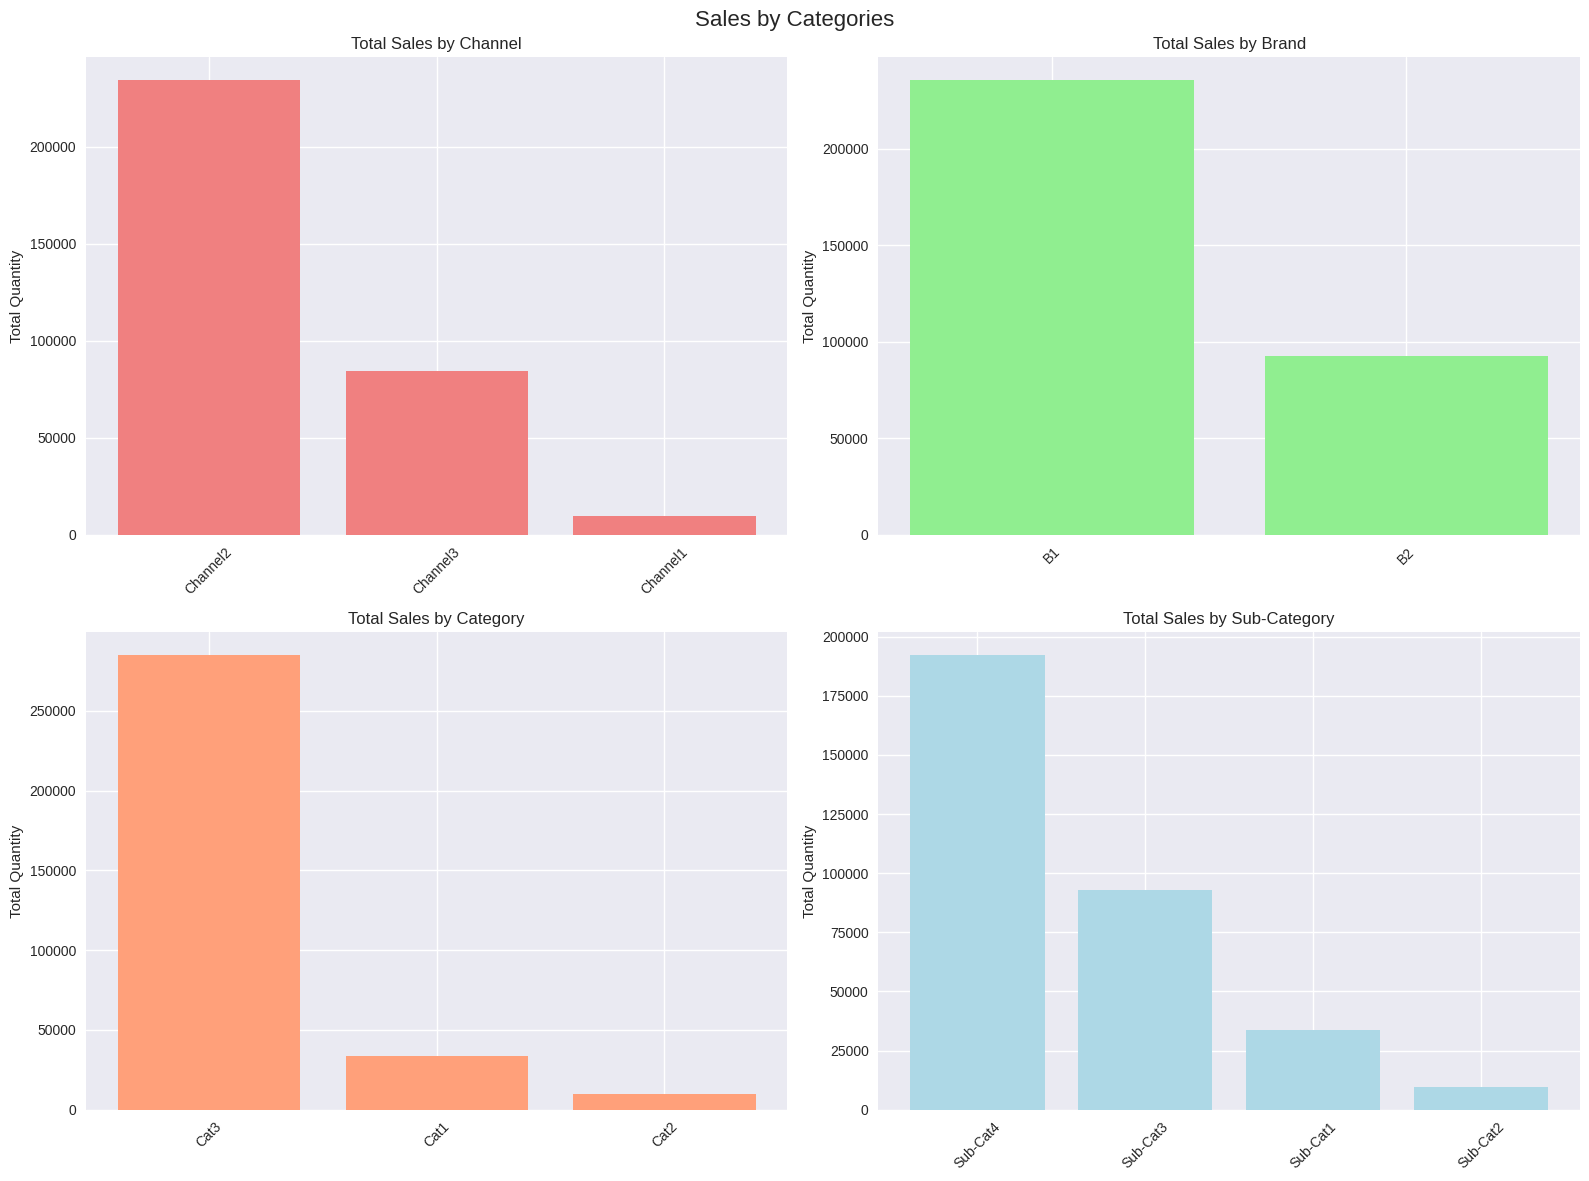

In [61]:


# Create visualizations for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Sales by Categories', fontsize=16)

# Sales by channel
if 'channel' in df.columns:
    channel_sales = df.groupby('channel')['quantity'].sum().sort_values(ascending=False)
    axes[0,0].bar(channel_sales.index, channel_sales.values, color='lightcoral')
    axes[0,0].set_title('Total Sales by Channel')
    axes[0,0].set_ylabel('Total Quantity')
    axes[0,0].tick_params(axis='x', rotation=45)

# Sales by brand
if 'brand' in df.columns:
    brand_sales = df.groupby('brand')['quantity'].sum().sort_values(ascending=False)
    axes[0,1].bar(brand_sales.index, brand_sales.values, color='lightgreen')
    axes[0,1].set_title('Total Sales by Brand')
    axes[0,1].set_ylabel('Total Quantity')
    axes[0,1].tick_params(axis='x', rotation=45)

# Sales by category
if 'category' in df.columns:
    category_sales = df.groupby('category')['quantity'].sum().sort_values(ascending=False)
    axes[1,0].bar(category_sales.index, category_sales.values, color='lightsalmon')
    axes[1,0].set_title('Total Sales by Category')
    axes[1,0].set_ylabel('Total Quantity')
    axes[1,0].tick_params(axis='x', rotation=45)

# Sales by sub_category
if 'sub_category' in df.columns:
    sub_cat_sales = df.groupby('sub_category')['quantity'].sum().sort_values(ascending=False)
    axes[1,1].bar(sub_cat_sales.index, sub_cat_sales.values, color='lightblue')
    axes[1,1].set_title('Total Sales by Sub-Category')
    axes[1,1].set_ylabel('Total Quantity')
    axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


SEASONAL ANALYSIS

In [60]:



# Add time-based features
df['year'] = df['weekend_date'].dt.year
df['month'] = df['weekend_date'].dt.month
df['week_of_year'] = df['weekend_date'].dt.isocalendar().week
df['quarter'] = df['weekend_date'].dt.quarter

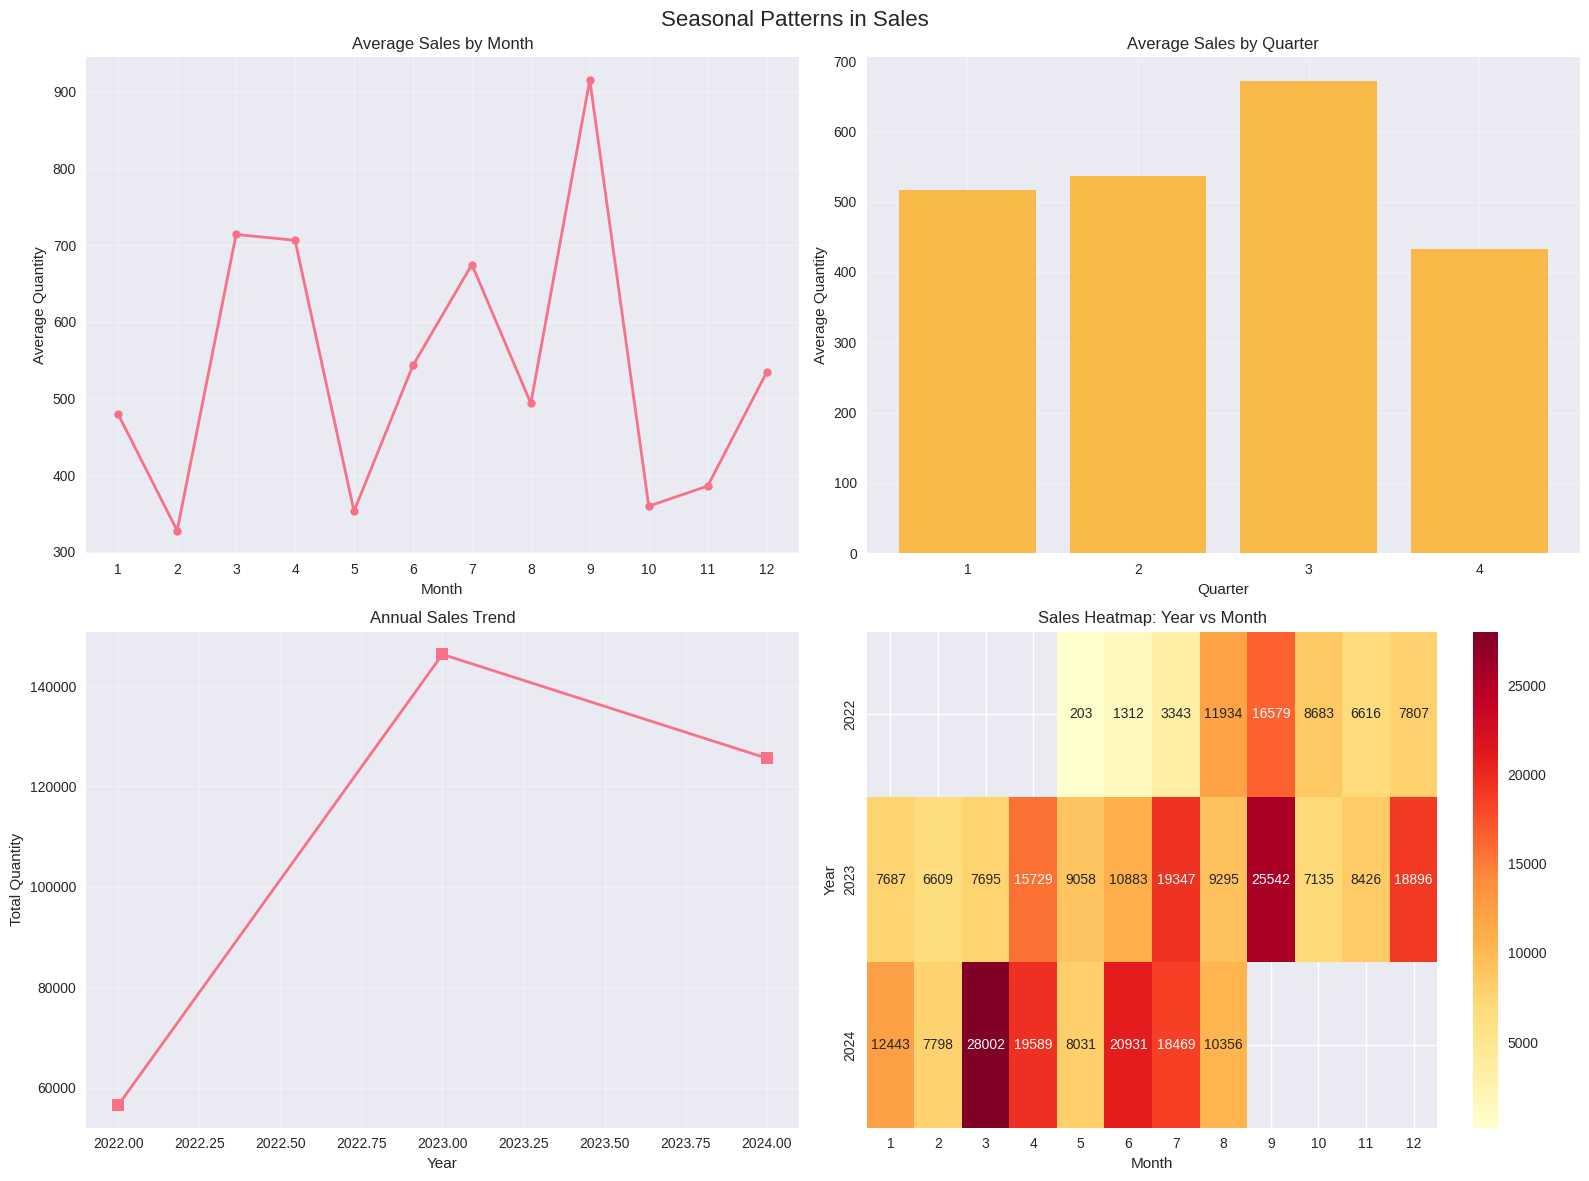

In [56]:
# Monthly seasonality
monthly_avg = df.groupby('month')['quantity'].mean()
quarterly_avg = df.groupby('quarter')['quantity'].mean()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Seasonal Patterns in Sales', fontsize=16)

# Monthly pattern
axes[0,0].plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2, markersize=6)
axes[0,0].set_title('Average Sales by Month')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Average Quantity')
axes[0,0].set_xticks(range(1, 13))
axes[0,0].grid(True, alpha=0.3)

# Quarterly pattern
axes[0,1].bar(quarterly_avg.index, quarterly_avg.values, color='orange', alpha=0.7)
axes[0,1].set_title('Average Sales by Quarter')
axes[0,1].set_xlabel('Quarter')
axes[0,1].set_ylabel('Average Quantity')
axes[0,1].set_xticks(range(1, 5))
axes[0,1].grid(True, alpha=0.3)

# Yearly trend
yearly_sales = df.groupby('year')['quantity'].sum()
axes[1,0].plot(yearly_sales.index, yearly_sales.values, marker='s', linewidth=2, markersize=8)
axes[1,0].set_title('Annual Sales Trend')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Total Quantity')
axes[1,0].grid(True, alpha=0.3)

# Heatmap of month vs year
pivot_data = df.groupby(['year', 'month'])['quantity'].sum().unstack()
sns.heatmap(pivot_data, annot=True, fmt='g', cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('Sales Heatmap: Year vs Month')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Year')

plt.tight_layout()
plt.show()

INDIVIDUAL SERIES ANALYSIS

In [63]:


print("INDIVIDUAL SERIES ANALYSIS")


# Analyze individual time series (SerialNum level)
serial_stats = df.groupby('SerialNum')['quantity'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).reset_index()
serial_stats.columns = ['SerialNum', 'weeks_count', 'mean_quantity', 'std_quantity', 'min_quantity', 'max_quantity']

print(f"Number of individual time series: {len(serial_stats)}")
print(f"\nSeries Statistics:")
print(serial_stats.describe())

INDIVIDUAL SERIES ANALYSIS
Number of individual time series: 5

Series Statistics:
       SerialNum  weeks_count  mean_quantity  std_quantity  min_quantity  \
count   5.000000     5.000000       5.000000      5.000000       5.00000   
mean    3.000000   120.000000     509.719839    620.778165      14.80000   
std     1.581139    21.154196     414.764203    550.635067      23.27445   
min     1.000000   106.000000      82.135593     46.706561       1.00000   
25%     2.000000   109.000000     277.509091    300.516730       3.00000   
50%     3.000000   110.000000     308.972477    355.973011       4.00000   
75%     4.000000   118.000000     797.160377   1061.156980      10.00000   
max     5.000000   157.000000    1082.821656   1339.537542      56.00000   

       max_quantity  
count      5.000000  
mean    3821.200000  
std     3499.403692  
min      271.000000  
25%     1783.000000  
50%     1911.000000  
75%     7090.000000  
max     8051.000000  



Data Quality Check:
Complete series (all 119 weeks): 0
Incomplete series: 4
Incomplete series summary:
   SerialNum  weeks_count
0          1          118
1          2          110
2          3          106
4          5          109


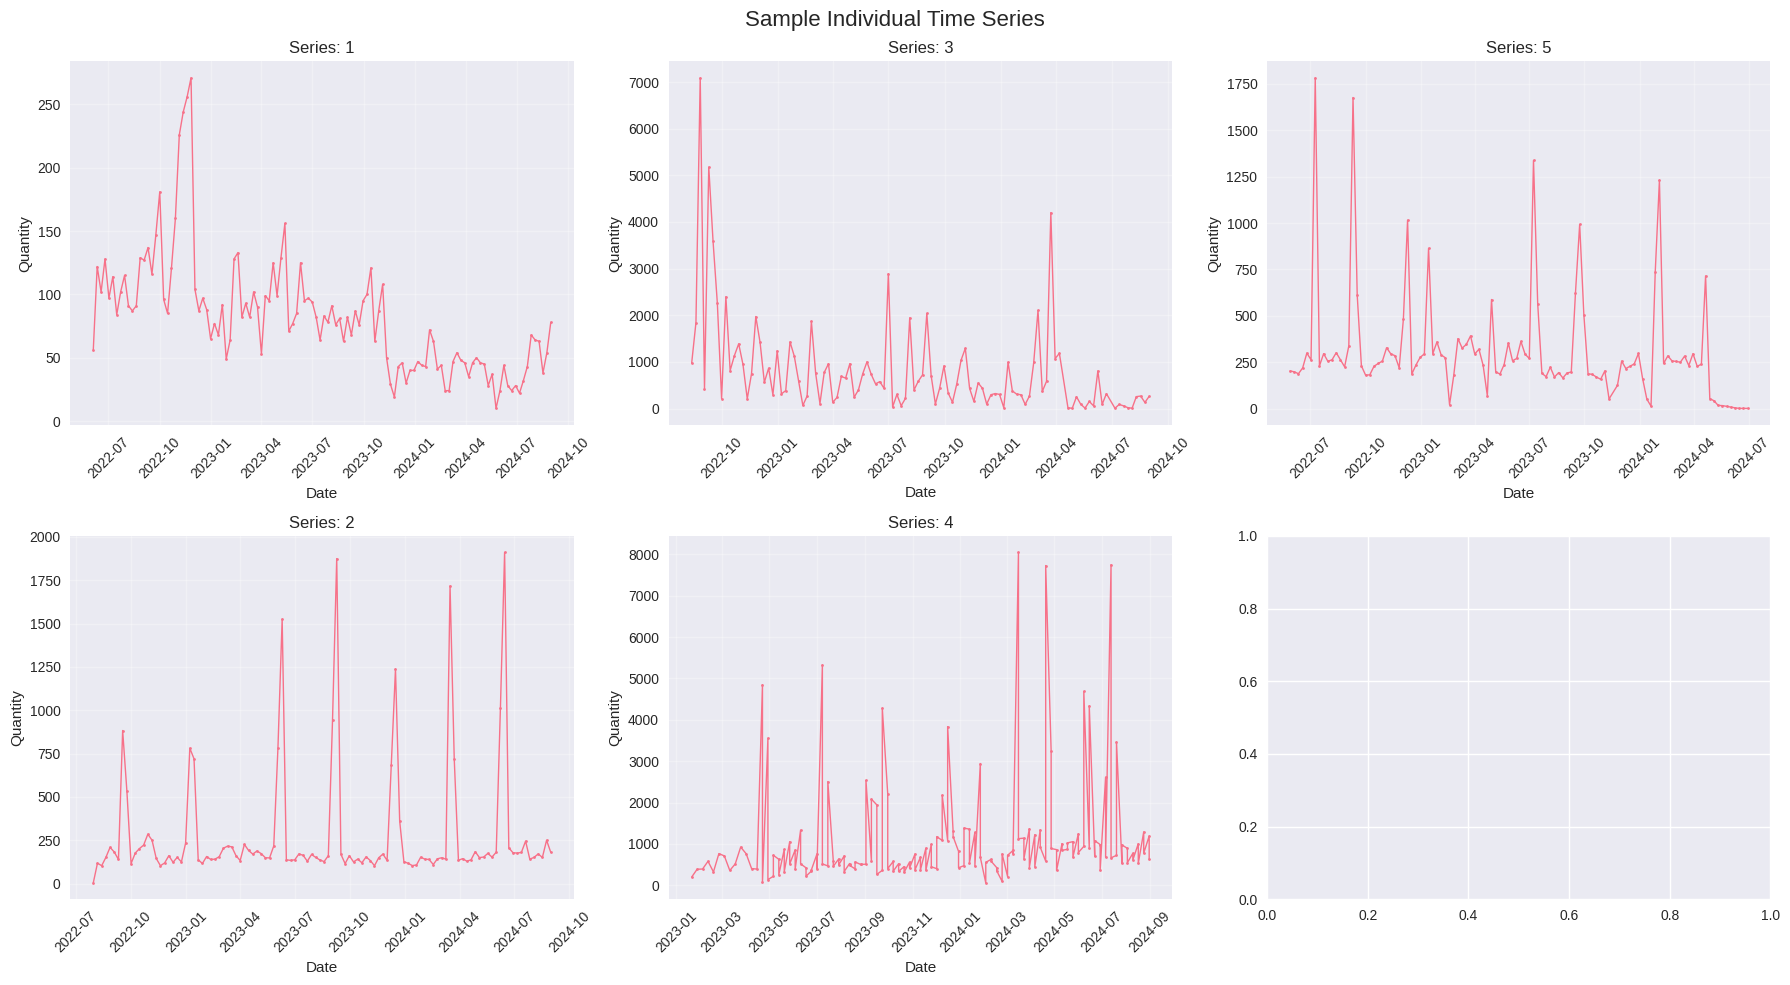

In [64]:
# Check for series with inconsistent data
print(f"\nData Quality Check:")
total_weeks = df['weekend_date'].nunique()
complete_series = serial_stats[serial_stats['weeks_count'] == total_weeks]
incomplete_series = serial_stats[serial_stats['weeks_count'] < total_weeks]

print(f"Complete series (all {total_weeks} weeks): {len(complete_series)}")
print(f"Incomplete series: {len(incomplete_series)}")

if len(incomplete_series) > 0:
    print(f"Incomplete series summary:")
    print(incomplete_series[['SerialNum', 'weeks_count']].head(10))

# Plot a few individual series as examples
sample_series = df['SerialNum'].unique()[:6]  # Take first 6 series
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Sample Individual Time Series', fontsize=16)

for i, serial in enumerate(sample_series):
    if i >= 6:
        break

    row = i // 3
    col = i % 3

    series_data = df[df['SerialNum'] == serial].sort_values('weekend_date')
    axes[row, col].plot(series_data['weekend_date'], series_data['quantity'],
                       linewidth=1, marker='o', markersize=2)
    axes[row, col].set_title(f'Series: {serial}')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Quantity')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

KEY FINDINGS SUMMARY

In [67]:



print(f"📊 DATASET OVERVIEW:")
print(f"   • Total records: {len(df):,}")
print(f"   • Time series count: {df['SerialNum'].nunique()}")
print(f"   • Date range: {df['weekend_date'].min().strftime('%Y-%m-%d')} to {df['weekend_date'].max().strftime('%Y-%m-%d')}")
print(f"   • Total weeks: {df['weekend_date'].nunique()}")

print(f"\n📈 SALES INSIGHTS:")
print(f"   • Average weekly sales: {df['quantity'].mean():.1f} units")
print(f"   • Total sales volume: {df['quantity'].sum():,} units")
print(f"   • Sales variability (CV): {df['quantity'].std()/df['quantity'].mean():.2f}")

print(f"\n🔍 DATA QUALITY:")
print(f"   • Missing values: {df.isnull().sum().sum()}")
print(f"   • Zero sales weeks: {len(zero_sales):,} ({len(zero_sales)/len(df)*100:.1f}%)")
print(f"   • Outlier records: {len(outliers):,} ({len(outliers)/len(df)*100:.1f}%)")

print(f"\n TEMPORAL PATTERNS:")
print(f"   • Peak sales month: {monthly_avg.idxmax()} (avg: {monthly_avg.max():.1f})")
print(f"   • Lowest sales month: {monthly_avg.idxmin()} (avg: {monthly_avg.min():.1f})")
print(f"   • Seasonal variation: {(monthly_avg.max() - monthly_avg.min())/monthly_avg.mean()*100:.1f}%")

print(f"\n  CONSIDERATIONS FOR FORECASTING:")
if len(incomplete_series) > 0:
    print(f"   • {len(incomplete_series)} series have incomplete data")
if len(outliers) > len(df) * 0.05:
    print(f"   • High outlier rate ({len(outliers)/len(df)*100:.1f}%) - consider treatment")
if len(zero_sales) > len(df) * 0.1:
    print(f"   • High zero-sales rate ({len(zero_sales)/len(df)*100:.1f}%) - consider handling")

print(f"\n READY FOR MODELING:")
print(f"   • Data appears suitable for time series forecasting")
print(f"   • Recommend building models at SerialNum level")
print(f"   • Consider seasonal decomposition and trend analysis")

# Save processed data for modeling
df.to_csv('processed_sales_data.csv', index=False)
print(f"\n💾 Processed data saved as 'processed_sales_data.csv'")


print("EDA COMPLETE - READY FOR MODELING")


📊 DATASET OVERVIEW:
   • Total records: 600
   • Time series count: 5
   • Date range: 2022-05-28 to 2024-08-31
   • Total weeks: 119

📈 SALES INSIGHTS:
   • Average weekly sales: 547.3 units
   • Total sales volume: 328,398 units
   • Sales variability (CV): 1.69

🔍 DATA QUALITY:
   • Missing values: 0
   • Zero sales weeks: 0 (0.0%)
   • Outlier records: 43 (7.2%)

 TEMPORAL PATTERNS:
   • Peak sales month: 9 (avg: 915.7)
   • Lowest sales month: 2 (avg: 327.4)
   • Seasonal variation: 108.8%

  CONSIDERATIONS FOR FORECASTING:
   • 4 series have incomplete data
   • High outlier rate (7.2%) - consider treatment

 READY FOR MODELING:
   • Data appears suitable for time series forecasting
   • Recommend building models at SerialNum level
   • Consider seasonal decomposition and trend analysis

💾 Processed data saved as 'processed_sales_data.csv'
EDA COMPLETE - READY FOR MODELING
